### CNN Basic

https://hoya012.github.io/blog/deeplearning-classification-guidebook-1/

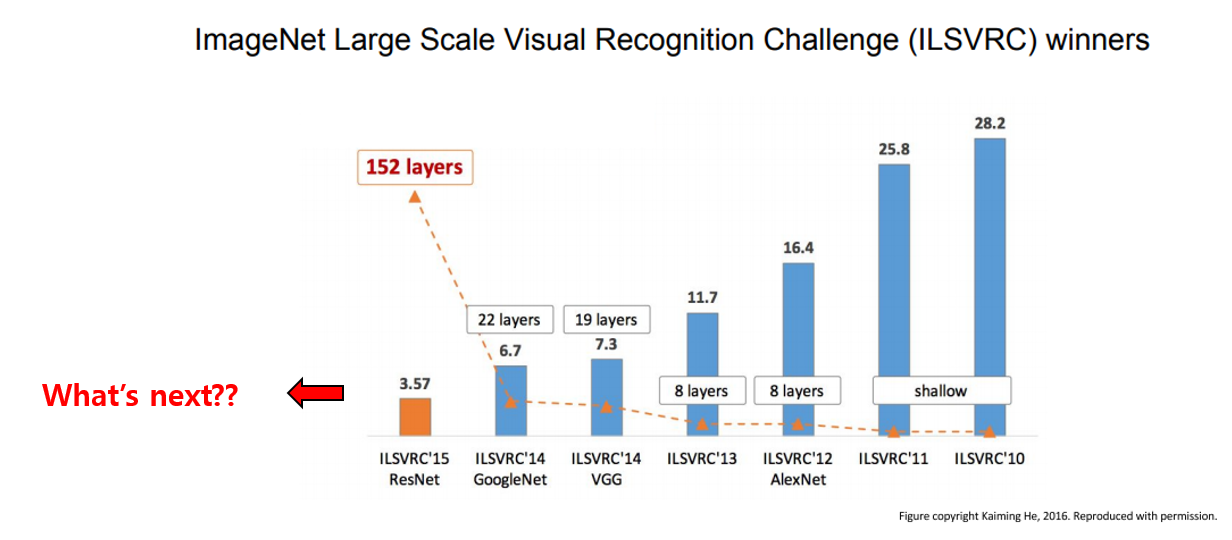

In [1]:
# cnn basic
# conv2d layer
# max pooling layer
# toy image 사용

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

[[[[1.]
   [2.]
   [3.]]

  [[4.]
   [5.]
   [6.]]

  [[7.]
   [8.]
   [9.]]]]
(1, 3, 3, 1)


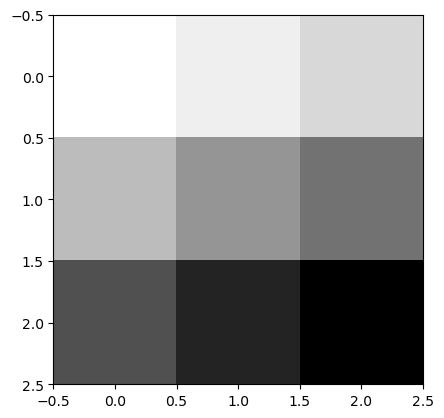

In [8]:
# 입력 이미지
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]]] , dtype=np.float32)
print(image)
print(image.shape)  # (1,3,3,1) , Rank=4, 4차원
plt.imshow(image.reshape(3,3),cmap='Greys')
plt.show()

[[[[12.]
   [16.]]

  [[24.]
   [28.]]]]
(1, 2, 2, 1)


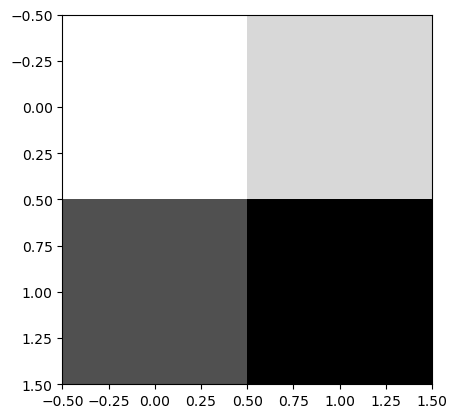

In [17]:
# CNN(Convolutional Neural Network)
# conv2d layer, filter : (2,2,1,1)  , strides : 1

# 입력 이미지 : (1,3,3,1) , NHWC
# 1  : 이미지의 갯수
# 3  : 세로 크기
# 3  : 가로 크기
# 1  : color , Grey scale ==> 1, RGB ==> 3

# filter : (2,2,1,1)
# 2 : 세로 크기
# 2 : 가로크기
# 1 : color , Grey scale ==> 1, RGB ==> 3
# 1 : filter 의 갯수

# 출력 사이즈 : (N - F)/strides + 1
# 출력 이미지 : (3 - 2)/1 + 1 = 2, zero padding을 안했을때(padding='VALID')

# filter : (2,2,1,1) 
weight = tf.constant([[[[1.]],[[1.]]],   
                      [[[1.]],[[1.]]]])
# print(weight.numpy())

# conv2d layer
conv2d = tf.nn.conv2d(image,weight,strides=[1,1,1,1],padding='VALID')

conv2d_image = conv2d.numpy()
print(conv2d_image)
print(conv2d_image.shape)  # (1,2,2,1)

# 시각화
plt.imshow(conv2d_image.reshape(2,2),cmap='Greys')
plt.show()

[[[[12.]
   [16.]
   [ 9.]]

  [[24.]
   [28.]
   [15.]]

  [[15.]
   [17.]
   [ 9.]]]]
(1, 3, 3, 1)


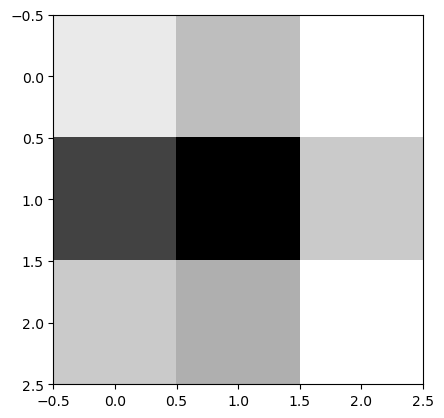

In [19]:
# 출력 이미지 : (3+1 - 2)/1 + 1 = 3, zero padding을 했을때(padding='SAME')
# filter : (2,2,1,1)  , strides : 1
# 입력 : (1,3,3,1)  --> 출력 : (1,3,3,1)

# filter : (2,2,1,1) 
weight = tf.constant([[[[1.]],[[1.]]],   
                      [[[1.]],[[1.]]]])

# conv2d layer
conv2d = tf.nn.conv2d(image,weight,strides=[1,1,1,1],padding='SAME')

conv2d_image = conv2d.numpy()
print(conv2d_image)
print(conv2d_image.shape)  # (1,3,3,1)

# 시각화
plt.imshow(conv2d_image.reshape(3,3),cmap='Greys')
plt.show()

[[[[ 1. 10. -1.]]

  [[ 1. 10. -1.]]]


 [[[ 1. 10. -1.]]

  [[ 1. 10. -1.]]]]
(2, 2, 1, 3)
[[[[ 12. 120. -12.]
   [ 16. 160. -16.]
   [  9.  90.  -9.]]

  [[ 24. 240. -24.]
   [ 28. 280. -28.]
   [ 15. 150. -15.]]

  [[ 15. 150. -15.]
   [ 17. 170. -17.]
   [  9.  90.  -9.]]]]
(1, 3, 3, 3)
[[[[ 12.]
   [ 16.]
   [  9.]]

  [[ 24.]
   [ 28.]
   [ 15.]]

  [[ 15.]
   [ 17.]
   [  9.]]]


 [[[120.]
   [160.]
   [ 90.]]

  [[240.]
   [280.]
   [150.]]

  [[150.]
   [170.]
   [ 90.]]]


 [[[-12.]
   [-16.]
   [ -9.]]

  [[-24.]
   [-28.]
   [-15.]]

  [[-15.]
   [-17.]
   [ -9.]]]]
(3, 3, 3, 1)
------------------------------


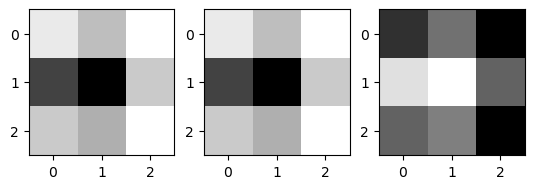

In [25]:
# conv2d layer, 3 filters, zero padding(padding='SAME')
# image : (1,3,3,1), filter : (2,2,1,3) , strides = (1,1,1,1)

# filter : (2,2,1,3)
weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],   
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print(weight.numpy())
print(weight.shape)  # (2, 2, 1, 3)

# conv2d layer
conv2d = tf.nn.conv2d(image,weight,strides=[1,1,1,1],padding='SAME')

conv2d_image = conv2d.numpy()
print(conv2d_image)
print(conv2d_image.shape)  # (1,3,3,3)

# 시각화
conv2d_image = np.swapaxes(conv2d_image,0,3) # 0번 축과 3번 축이 서로 맞바꾸어짐
print(conv2d_image)
print(conv2d_image.shape)  # (3,3,3,1)
print('-'*30)

for i,one_image in enumerate(conv2d_image): # 3회 반복
    #     print(i,one_image)
    plt.subplot(1,3,i+1)
    plt.imshow(one_image.reshape(3,3),cmap='Greys')
plt.show()

[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]
(1, 2, 2, 1)


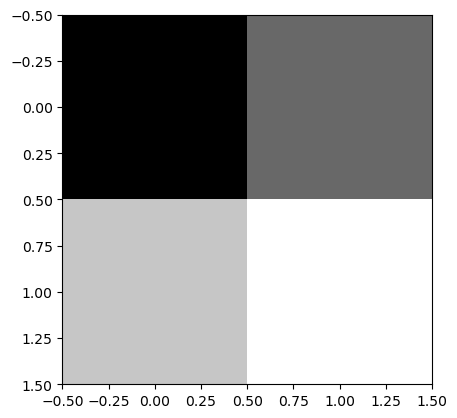

In [26]:
# max pooling
image  = np.array([[[[4.],[3.]],
                    [[2.],[1.]]]],dtype=np.float32)
print(image)
print(image.shape) # (1, 2, 2, 1)
plt.imshow(image.reshape(2,2),cmap='Greys')
plt.show()

In [28]:
# padding='VALID' , zero padding을 하지 않음, (1,2,2,1) -> (1,1,1,1)
# (N - F)/strides + 1, F : kernel size(ksize)
# (2 - 2)/1 + 1 = 1
# ksize : 2, 원본에서 추출할 이미지의 범위

pool = tf.nn.max_pool(image,ksize=[1,2,2,1],strides=[1,1,1,1],padding='VALID')
print(pool.numpy())
print(pool.shape)

[[[[4.]]]]
(1, 1, 1, 1)


In [29]:
# padding='SAME' , zero padding을 했을 때, (1,2,2,1) -> (1,2,2,1)
# (N - F)/strides + 1, F : kernel size(ksize)
# (2+1 - 2)/1 + 1 = 2
# ksize : 2, 원본에서 추출할 이미지의 범위

pool = tf.nn.max_pool(image,ksize=[1,2,2,1],strides=[1,1,1,1],padding='SAME')
print(pool.numpy())
print(pool.shape)  #  (1,2,2,1)

[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]
(1, 2, 2, 1)


(60000, 28, 28) (10000, 28, 28)
(28, 28)
T-shirt/top


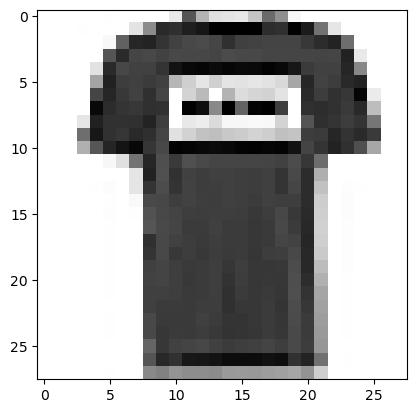

In [51]:
# Fashion MNIST imgae data 처리
# fashin_mnist 데이터 가져오기

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
print(x_train.shape,x_test.shape)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

image = x_train[1]
print(image.shape)
print(class_names[y_train[1]])

plt.imshow(image,cmap='Greys')
plt.show()

(1, 28, 28, 1)
(1, 14, 14, 5)
(5, 14, 14, 1)


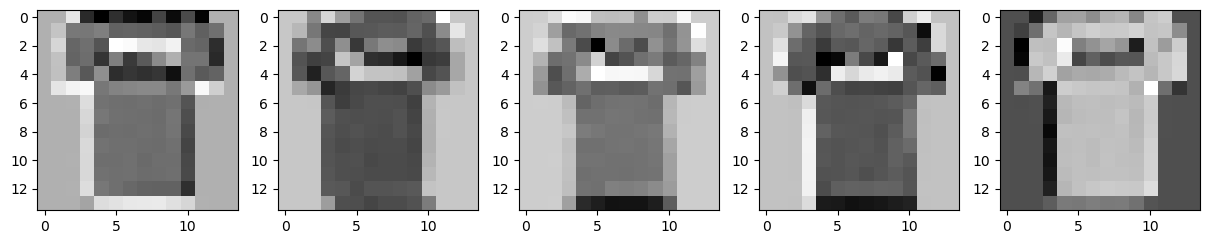

In [53]:
#### Fashion MNIST conv2d layer
# image : (1,28,28,1)
# filter : (3,3,1,5) , 필터 5개
# stride : (1,2,2,1) , padding='SAME'
# 출력 이미지 : (28+2 - 3)/2 + 1 = 14
# (1,28,28,1)  ---> (1,14,14,5)

img = image.reshape(-1,28,28,1)
print(img.shape)

W = tf.Variable(tf.random.normal([3,3,1,5]),name='weight')  # filter = weight

conv2d = tf.nn.conv2d(img,W,strides=[1,2,2,1],padding="SAME")
conv2d_image = conv2d.numpy()
print(conv2d_image.shape)  # (1,14,14,5)

# 시각화
conv2d_image = np.swapaxes(conv2d_image,0,3) # 0번 축과 3번 축이 서로 맞바꾸어짐
# print(conv2d_image)
print(conv2d_image.shape)   # (5, 14, 14, 1)

plt.figure(figsize=(15,15))  # 5회 반복
for i,one_image in enumerate(conv2d_image):
    #     print(i,one_image)
    plt.subplot(1,5,i+1)
    plt.imshow(one_image.reshape(14,14),cmap='Greys')
plt.show()